<a href="https://colab.research.google.com/github/hizafioramahardika/PCVK_Genap_2021/blob/main/LabAssignment_week11ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modify the CNN model in lab work 2 to achieve a testing accuracy of more than 80%

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Library

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

Download CIFAR dataset

170498071/170498071 [==============================] - 5s 0us/step


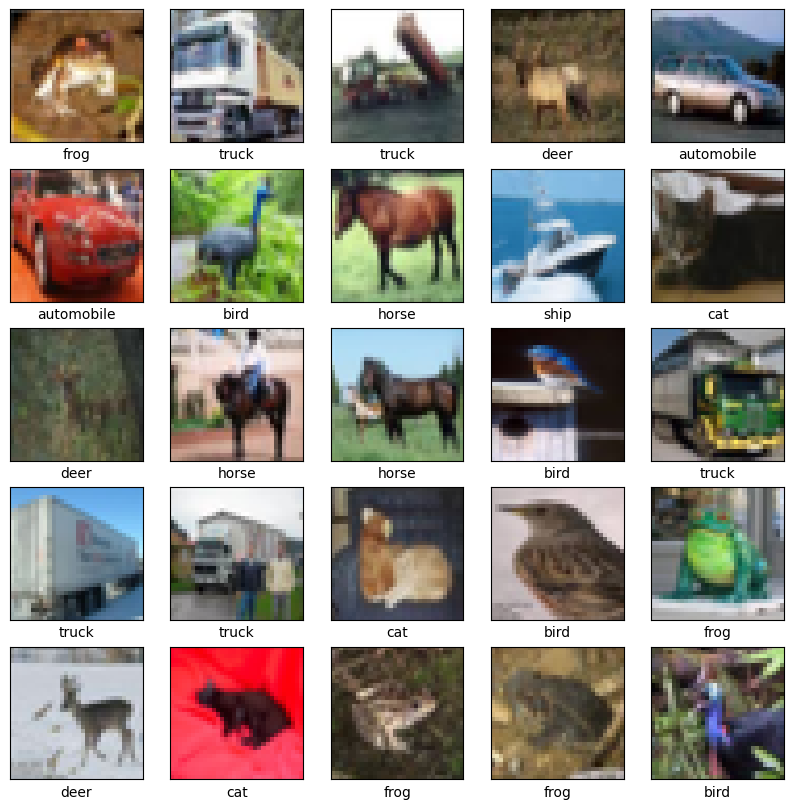

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (_, _) = cifar10.load_data()
train_images = train_images.astype('float32') / 255
train_labels = to_categorical(train_labels)

# Display the first 25 images with labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[np.argmax(train_labels[i])])

plt.show()


Add Convolutional Block

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),activation='relu', padding='same',input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3),activation='relu',padding='same'))
model.add(layers.Conv2D(64, (3, 3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3),activation='relu',padding='same'))
model.add(layers.Conv2D(128, (3, 3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

Check The Architecture

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        1

Add Fully Connected Block

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10))

Check The Final Architecture

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        1

Compile CNN Model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train CNN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Create and compile the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.1458 - accuracy: 0.9554 - val_loss: 0.0660 - val_accuracy: 0.9791
Epoch 2/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0474 - accuracy: 0.9853 - val_loss: 0.0429 - val_accuracy: 0.9865
Epoch 3/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0325 - accuracy: 0.9899 - val_loss: 0.0368 - val_accuracy: 0.9884
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0253 - accuracy: 0.9916 - val_loss: 0.0255 - val_accuracy: 0.9924
Epoch 5/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0184 - accuracy: 0.9941 - val_loss: 0.0287 - val_accuracy: 0.9915
Epoch 6/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0162 - accuracy: 0.9945 - val_loss: 0.0282 - val_accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 68s

Evaluate The Model

313/313 - 4s - loss: 0.0366 - accuracy: 0.9913 - 4s/epoch - 12ms/step


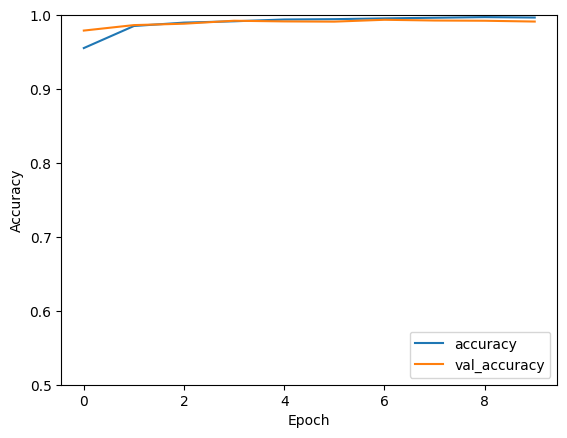

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Print The Accuracy

In [ ]:
print(test_acc)

0.9912999868392944


# Create a CNN model for classifying the MNIST dataset.

Epoch 1/3
1875/1875 [==============================] - 67s 35ms/step - loss: 0.1469 - accuracy: 0.9546 - val_loss: 0.0421 - val_accuracy: 0.9850
Epoch 2/3
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0457 - accuracy: 0.9860 - val_loss: 0.0321 - val_accuracy: 0.9886
Epoch 3/3
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0330 - accuracy: 0.9897 - val_loss: 0.0274 - val_accuracy: 0.9910


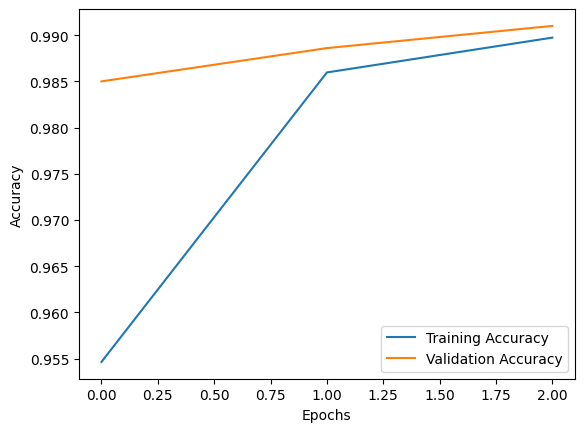

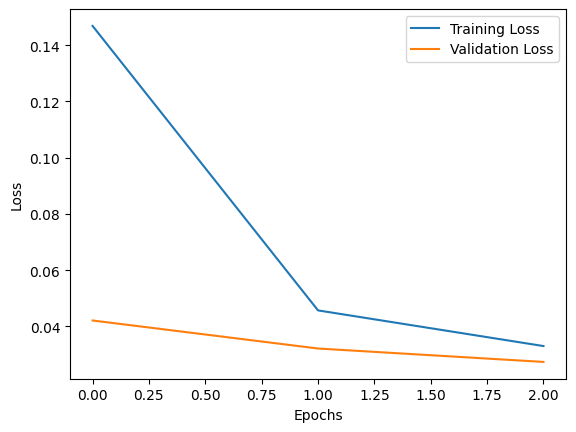

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=3, validation_data=(test_images, test_labels))

# Plot training and validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
